#Dataset and References

Dataset: https://www.kaggle.com/c/digit-recognizer/data<br>
Reference: https://elitedatascience.com/keras-tutorial-deep-learning-in-python<br>

<h3>Validation Acc.: 0.98904</h3>
<h3>Submission Acc.: 0.98878</h3>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
import os

PATH = "/content/gdrive/My Drive/Colab Notebooks/Digit_Recogniser_MNIST/"

os.chdir(PATH)

for dirname, _, files in os.walk("./"):
    for file in files:
        print(os.path.join(dirname, file))

./kaggle.json
./sample_submission.csv
./test.csv.zip
./train.csv.zip
./notebook-2.h5
./Notebook-1.ipynb
./Notebook-2.ipynb
./Dataset/test.csv
./Dataset/train.csv


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_train = pd.read_csv("./Dataset/train.csv")
df_test = pd.read_csv("./Dataset/test.csv")

print(df_train.shape, df_test.shape)
df_train.head()

(42000, 785) (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = df_train.drop(['label'], axis=1).values.astype('float32')
y_train = df_train.label

X_test = df_test.values.astype('float32')

print(X_train.shape, y_train.shape, X_test.shape)

(42000, 784) (42000,) (28000, 784)


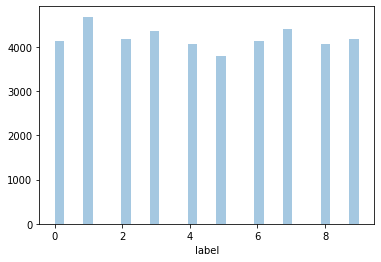

In [ ]:
sns.distplot(y_train, kde=False)

In [ ]:
from keras.utils.np_utils import to_categorical

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train /= 255
X_test /= 255

y_train = to_categorical(y_train, 10)

print(X_train.shape, y_train.shape, X_test.shape)

Using TensorFlow backend.


(42000, 28, 28, 1) (42000, 10) (28000, 28, 28, 1)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=16)

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(37800, 28, 28, 1) (37800, 10) (4200, 28, 28, 1) (4200, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Activation, MaxPooling2D, Convolution2D

model = Sequential([
    Convolution2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Convolution2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

In [ ]:
batch = 32
epochs = 25

In [ ]:
history = model.fit(X_train, y_train, batch_size=batch, epochs=epochs, verbose=1)

Epoch 1/25
37800/37800 [==============================] - 16s 431us/step - loss: 0.2549 - accuracy: 0.9219
Epoch 2/25
37800/37800 [==============================] - 10s 265us/step - loss: 0.0996 - accuracy: 0.9693
Epoch 3/25
37800/37800 [==============================] - 10s 266us/step - loss: 0.0749 - accuracy: 0.9765
Epoch 4/25
37800/37800 [==============================] - 10s 267us/step - loss: 0.0590 - accuracy: 0.9815
Epoch 5/25
37800/37800 [==============================] - 10s 266us/step - loss: 0.0528 - accuracy: 0.9833
Epoch 6/25
37800/37800 [==============================] - 10s 273us/step - loss: 0.0454 - accuracy: 0.9864
Epoch 7/25
37800/37800 [==============================] - 10s 271us/step - loss: 0.0410 - accuracy: 0.9871
Epoch 8/25
37800/37800 [==============================] - 10s 271us/step - loss: 0.0376 - accuracy: 0.9876
Epoch 9/25
37800/37800 [==============================] - 11s 287us/step - loss: 0.0322 - accuracy: 0.9896
Epoch 10/25
37800/37800 [============

In [ ]:
model.save_weights("notebook-2.h5", overwrite=True)

In [ ]:
score = model.evaluate(X_valid, y_valid, verbose=1)

4200/4200 [==============================] - 1s 129us/step


In [ ]:
print('Test Loss: ', score[0])
print('Test Accuracy: ', score[1])

Test Loss:  0.06008693587033511
Test Accuracy:  0.989047646522522


In [ ]:
y_predict = model.predict(X_test)
y_test = [np.argmax(y, axis=None, out=None) for y in y_predict]

y_test

[2,
 0,
 9,
 0,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 9,
 9,
 2,
 3,
 5,
 4,
 1,
 8,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 3,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 5,


In [ ]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(y_test)+1)),"Label": y_test})
submissions.to_csv("DR.csv", index=False, header=True)